# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [43]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
customers.isnull().sum()/len(customers)*100

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

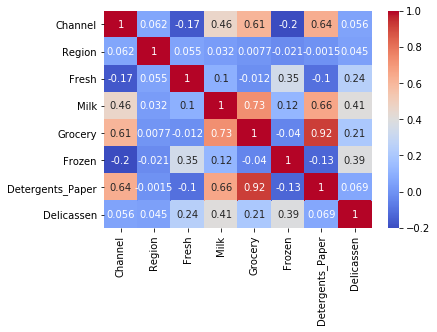

In [7]:
sn.heatmap(customers.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
stats = customers.describe().T
stats['IQR'] = stats['75%'] - stats['25%']

In [9]:
customers.skew(axis = 0, skipna = True)

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

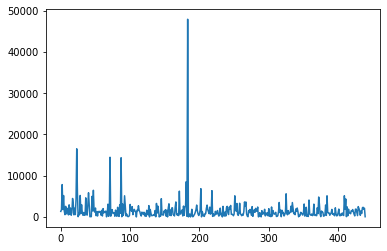

Skew applying log: -1.1771712036024342


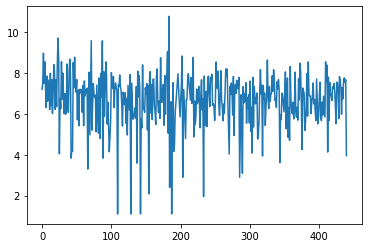

Skew applying Square Root: 2.6759174853463095


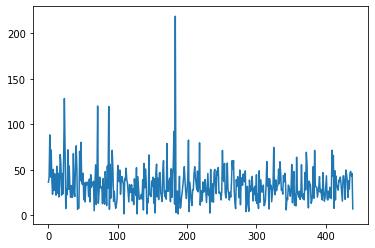

Skew applying Box-Cox: 0.10480758697545056


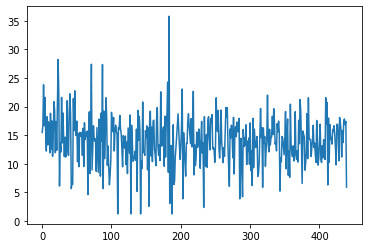

In [10]:
plt.plot(customers['Delicassen'])
plt.show()

#Log transform
deli_log = np.log(customers['Delicassen'])
print(f'Skew applying log: {deli_log.skew()}')
plt.plot(deli_log)
plt.show()

#Square Root transform
deli_sqrt = np.sqrt(customers['Delicassen'])
print(f'Skew applying Square Root: {deli_sqrt.skew()}')
plt.plot(deli_sqrt)
plt.show()

#BoxCox transform (just for postive values).
from scipy import stats
deli_boxcox = stats.boxcox(customers['Delicassen'])[0]
print(f'Skew applying Box-Cox: {pd.Series(deli_boxcox).skew()}')
plt.plot(deli_boxcox)
plt.show()

In [11]:
customers['Total'] = customers.iloc[:,2:7].sum(axis=1)

In [12]:
customers = customers.sort_values(by='Total', ascending=False)
#customers['Acum_total'] = customers['Per_total'].cumsum()
len(customers)

440

In [13]:
def get_20per(df):

    start = 0
    end = int(len(df) * 0.2)

    return df.iloc[start:end, :]

better_customer = get_20per(customers)
better_customer['Total'].sum()/customers['Total'].sum() *100

42.977162440530584

In [14]:
# Your observations here
#We have a dataset with the money that 440 customers spend in the different parts of a grocery.
#The 'Channel' means, 1 (Horeca)/ 2 (Retail)
#The 'Region' means, 1 (Lisbon)/2 (Oporto)/ 3 (Other Region)
#The rest are the money spent in every grocery section.
#The categorical data are already converted to numeric data, so it is ok.
#No missing data.
#There a strong positive correlation between the money spent in'Grocery' and 'Detergent_Paper'.
#We have found some outliers the we have dropped out.
#Data distribution is skewed, so we should do a squared root transform as get the better aproximation to zero.
#The 20% of the better customers provide the 43% of the incomes.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [15]:
stats = customers.describe().T
stats['IQR'] = stats['75%'] - stats['25%']

outliers = pd.DataFrame(columns=customers.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = customers[(customers[col] < lower) | 
                   (customers[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

/home/cristina/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [16]:
customers = customers.drop(index=outliers.index)
customers.reset_index(drop=True)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,2,3,31714,12319,11757,287,3881,2931,59958
1,2,3,15615,12653,19858,4425,7108,2379,59659
2,1,3,37036,7152,8253,2995,20,3,55456
3,1,1,29526,7961,16966,432,363,1391,55248
4,1,3,34454,7435,8469,2540,1711,2893,54609
...,...,...,...,...,...,...,...,...,...
327,1,3,2101,589,314,346,70,310,3420
328,1,3,190,727,2012,245,184,127,3358
329,1,3,503,112,778,895,56,132,2344
330,1,3,403,254,610,774,54,63,2095


In [17]:
# Your code here
def sqrt_trans(x):
    x = np.sqrt(x)
    return x

customers[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].apply(sqrt_trans)
customers.skew(axis = 0, skipna = True)

Channel             0.950652
Region             -1.273991
Fresh               1.079902
Milk                1.006195
Grocery             1.204142
Frozen              1.347470
Detergents_Paper    1.242993
Delicassen          1.034561
Total               0.656432
dtype: float64

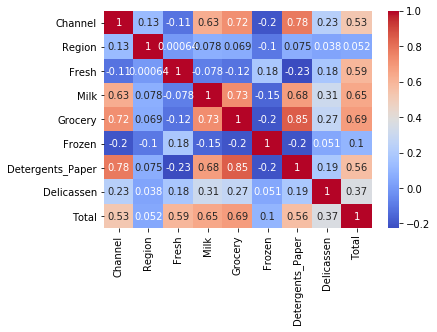

In [18]:
sn.heatmap(customers.corr(), annot=True, cmap='coolwarm')

In [19]:
# Your comment here
#We had dropped out outliers.
#Squared transformation to get better values for skewness.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [ ]:
customers = customers.drop(columns = ['Total'])

In [37]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
cat_features = ['Channel', 'Region']
num_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

cat_customers = pd.get_dummies(customers[cat_features])
num_customers = customers.loc[:,num_features]
customers = pd.concat([cat_customers, num_customers], axis=1)

features = list(cat_customers.columns) + list(num_customers.columns)
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers.loc[:,features].values)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

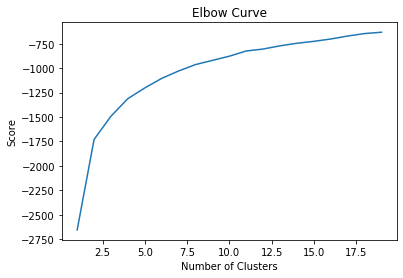

In [38]:
# Your code here:
from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(customers_scale).score(customers_scale) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#I'll consider 5 a good number for clusters.

In [40]:
kmeans = KMeans(n_clusters=5).fit(customers_scale)
centroids = kmeans.cluster_centers_
customers['labels'] = kmeans.labels_
print(centroids)
customers

[[-0.56174827 -1.74365092  0.0283063  -0.42813978 -0.4384428   0.36793867
  -0.45078993 -0.282647  ]
 [ 1.3950906   0.05656653 -0.5872938   1.4594496   1.78036494 -0.29675962
   1.95203624  0.26558391]
 [ 1.49096976  0.4108273   0.19733192  0.62542968  0.638893   -0.42675261
   0.59614525  0.57325886]
 [-0.63312233  0.43284223  1.10088005 -0.22056967 -0.43136329  1.0081399
  -0.58706734  0.39155231]
 [-0.61388236  0.52328514 -0.40157954 -0.5409385  -0.5707044  -0.38864417
  -0.53994077 -0.40178555]]


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
12,2,3,31714,12319,11757,287,3881,2931,2
165,2,3,15615,12653,19858,4425,7108,2379,1
142,1,3,37036,7152,8253,2995,20,3,3
253,1,1,29526,7961,16966,432,363,1391,0
382,1,3,34454,7435,8469,2540,1711,2893,3
...,...,...,...,...,...,...,...,...,...
131,1,3,2101,589,314,346,70,310,4
355,1,3,190,727,2012,245,184,127,4
98,1,3,503,112,778,895,56,132,4
97,1,3,403,254,610,774,54,63,4


Count the values in `labels`.

In [41]:
# Your code here:
customers['labels'].value_counts()

4    115
0     62
3     57
2     50
1     48
Name: labels, dtype: int64

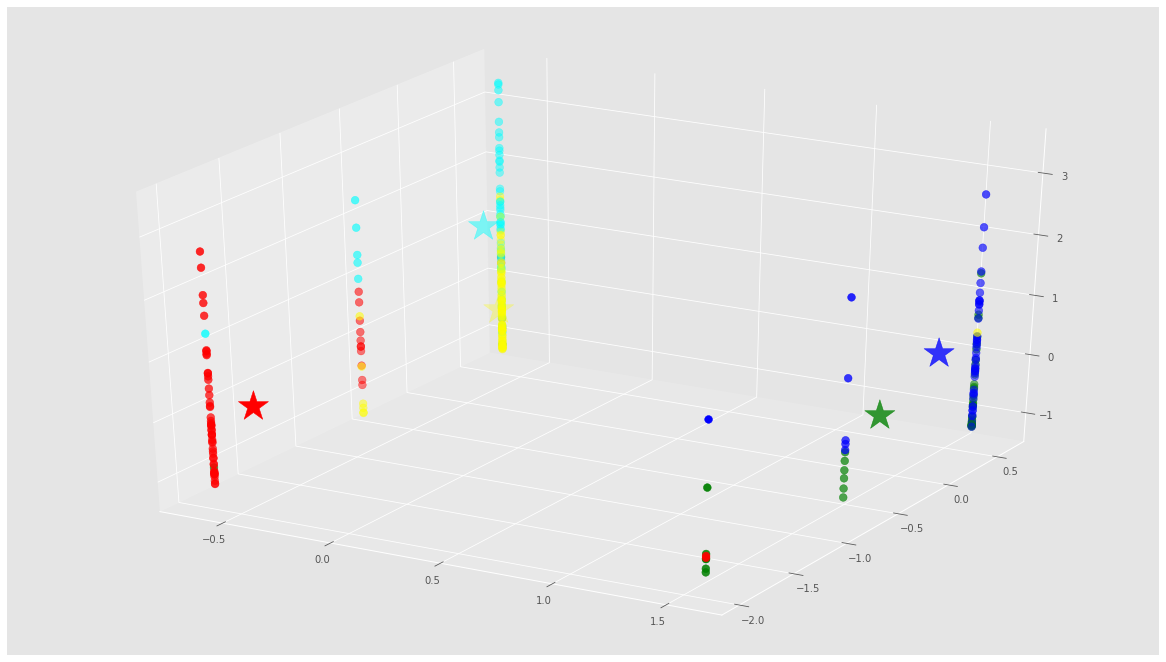

In [44]:
# Predicting the clusters
labels = kmeans.predict(customers_scale)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(customers_scale[:, 0], customers_scale[:, 1], customers_scale[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [57]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5).fit(customers_scale)
labels = dbscan.labels_
customers['labels_DBSCAN'] = dbscan.labels_ 

Count the values in `labels_DBSCAN`.

In [58]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    308
 0     24
Name: labels_DBSCAN, dtype: int64

In [74]:
customers_scale.shape

(332, 8)

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

1Channel 	2Region 	3Fresh 	4Milk 	5Grocery 	6Frozen 	7Detergents_Paper 	8Delicassen

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

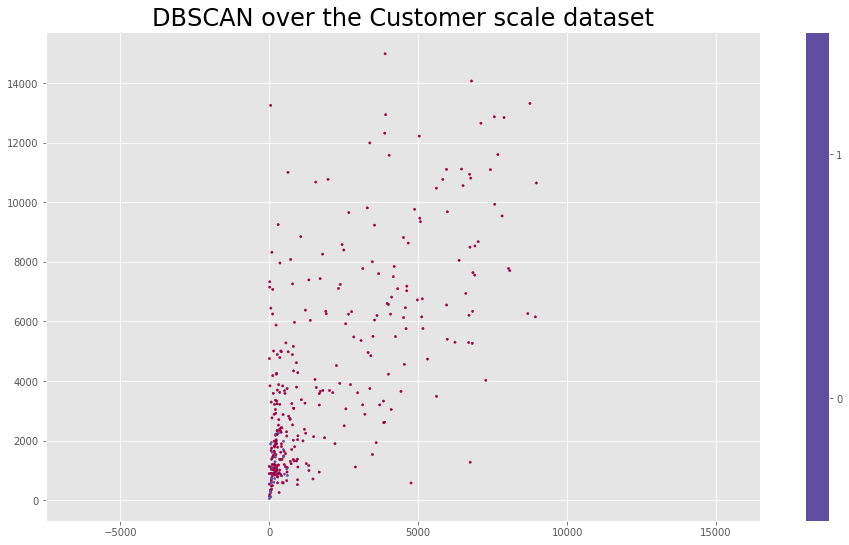

In [88]:
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=dbscan.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(dbscan.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(dbscan.labels_))))
plt.title('DBSCAN over the Customer scale dataset', fontsize=24);

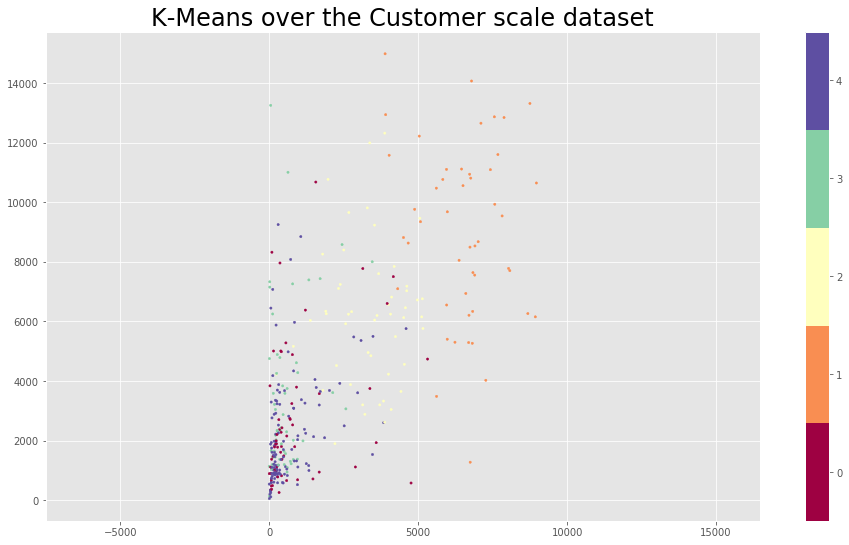

In [89]:
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Customer scale dataset', fontsize=24);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

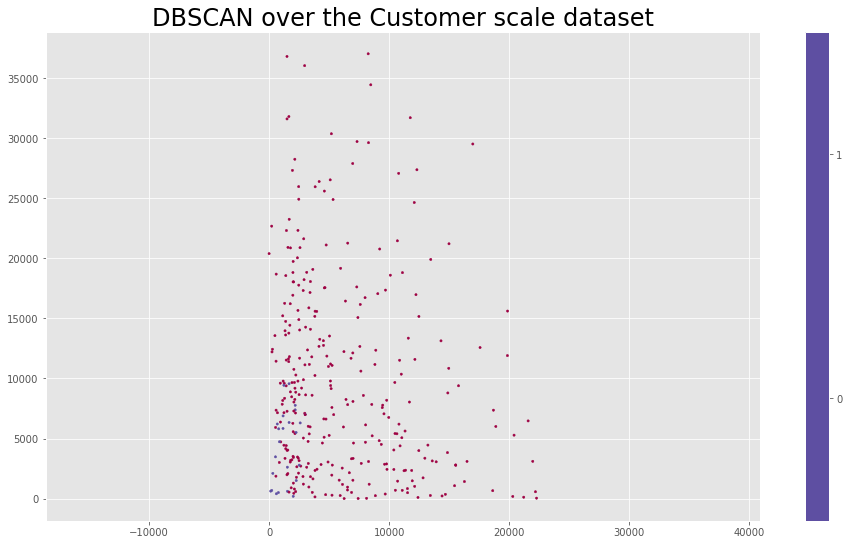

In [91]:
plt.scatter(customers['Grocery'], customers['Fresh'], c=dbscan.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(dbscan.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(dbscan.labels_))))
plt.title('DBSCAN over the Customer scale dataset', fontsize=24);

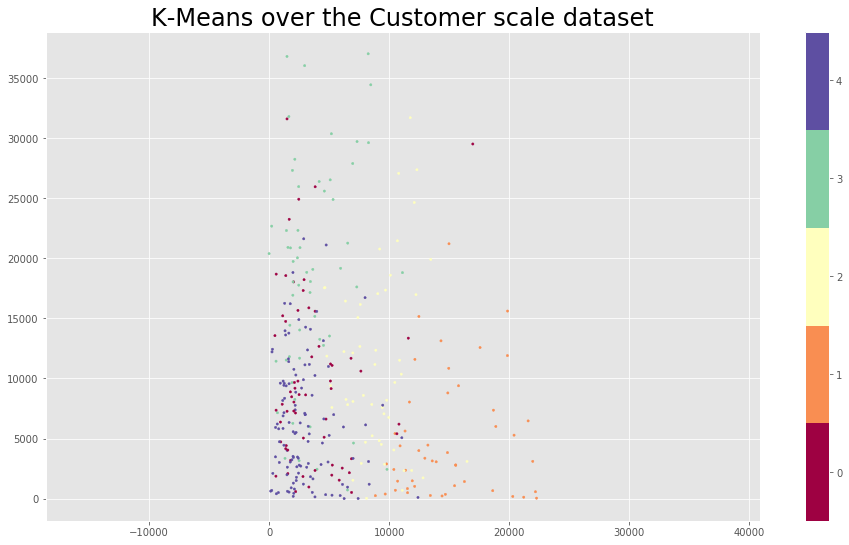

In [90]:
plt.scatter(customers['Grocery'], customers['Fresh'], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Customer scale dataset', fontsize=24);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

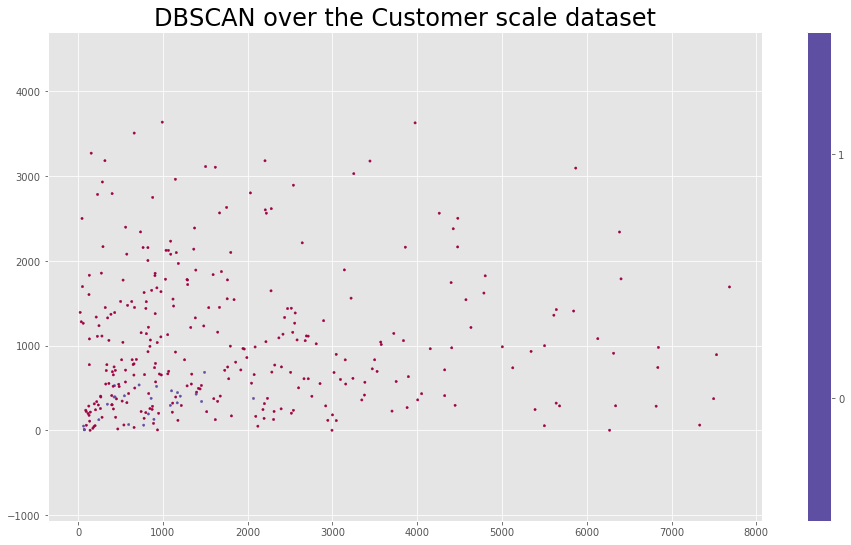

In [95]:
# Your code here:
plt.scatter(customers['Frozen'], customers['Delicassen'], c=dbscan.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(dbscan.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(dbscan.labels_))))
plt.title('DBSCAN over the Customer scale dataset', fontsize=24);

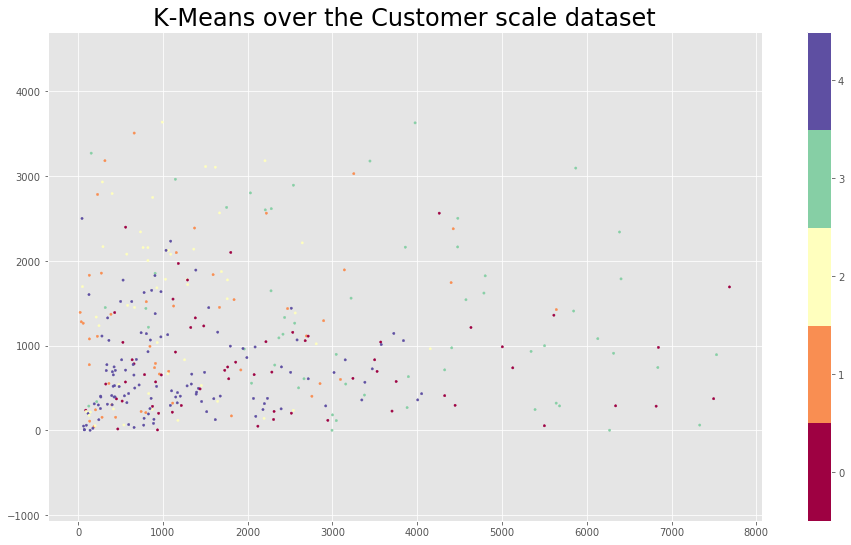

In [94]:
plt.scatter(customers['Frozen'], customers['Delicassen'], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Customer scale dataset', fontsize=24);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [97]:
# Your code here:
customers.groupby(['labels_DBSCAN', 'labels']).mean()

Channel    Region         Fresh         Milk  \
labels_DBSCAN labels                                                  
-1            0       1.032258  1.177419   9778.080645  2667.387097   
              1       1.916667  2.583333   4761.229167  9006.354167   
              2       1.960000  2.860000  11155.560000  6205.520000   
              3       1.000000  2.877193  18519.052632  3364.456140   
              4       1.010989  2.934066   6783.747253  2595.637363   
 0            4       1.000000  3.000000   4344.625000  1124.333333   

                           Grocery       Frozen  Detergents_Paper   Delicassen  
labels_DBSCAN labels                                                            
-1            0        3669.661290  2490.500000        902.354839   783.951613  
              1       14833.229167  1356.979167       6534.416667  1235.208333  
              2        9090.100000  1135.300000       3356.300000  1488.460000  
              3        3705.280702  3582.245614        582.929825  1338.894737  
              4        3424.164835  1293.494505        815.428571   779.978022  
 0            4        1411.875000   846.875000        230.666667   329.125000

Which algorithm appears to perform better?

In [29]:
# Your observations here
#K-means seems to be better as the differences between the groups are significant. DBSCAN do a very simple clustering.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [30]:
# Your code here

In [31]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [32]:
# Your code here

In [33]:
# Your comment here